In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv("Attrition Data.csv")
df

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Research & Development,23,2,Medical,3,4,Married,2571,4,3,5
1466,39,No,Research & Development,6,1,Medical,4,1,Married,9991,4,3,7
1467,27,No,Research & Development,4,3,Life Sciences,2,2,Married,6142,1,3,6
1468,49,No,Sales,2,3,Medical,4,2,Married,5390,2,2,9


In [3]:
df.isnull().sum().any()

False

In [4]:
df.dtypes

Age                         int64
Attrition                  object
Department                 object
DistanceFromHome            int64
Education                   int64
EducationField             object
EnvironmentSatisfaction     int64
JobSatisfaction             int64
MaritalStatus              object
MonthlyIncome               int64
NumCompaniesWorked          int64
WorkLifeBalance             int64
YearsAtCompany              int64
dtype: object

In [10]:
#1 For different departments find the mean age of the employees who have left the company.
#df[df['Attrition']=='Yes'].groupby('Department')['Age'].mean()

In [5]:
#Doubt
#2 For different departments find the distance from home which is covered by the maximum number of employees to get to the company.
#df.groupby('Department')['DistanceFromHome'].mode()
df.groupby('Department')['DistanceFromHome'].agg(pd.Series.mode)

Department
Human Resources           2
Research & Development    1
Sales                     2
Name: DistanceFromHome, dtype: int64

In [6]:
#3 The company wants to compare the average salary of employees who have left the job and those who haven’t. Analyze different Departments.
emp_left=df[df['Attrition']=="Yes"].groupby('Department')['MonthlyIncome'].mean()
emp_notleft= df[df['Attrition']=="No"].groupby('Department')['MonthlyIncome'].mean()
print(emp_left)
print(emp_notleft)

Department
Human Resources           3715.750000
Research & Development    4108.075188
Sales                     5908.456522
Name: MonthlyIncome, dtype: float64
Department
Human Resources           7345.980392
Research & Development    6630.326087
Sales                     7232.240113
Name: MonthlyIncome, dtype: float64


In [7]:
#4 The company wants to analyze the median of job satisfaction ratings for different marital statuses.
df.groupby('MaritalStatus')['JobSatisfaction'].median()


MaritalStatus
Divorced    3.0
Married     3.0
Single      3.0
Name: JobSatisfaction, dtype: float64

In [8]:
#5 Find the mean of environment satisfaction rating for the employees with different Education Fields.
df.groupby('EducationField')['EnvironmentSatisfaction'].mean()

EducationField
Human Resources     2.666667
Life Sciences       2.689769
Marketing           2.723270
Medical             2.687500
Other               3.012195
Technical Degree    2.818182
Name: EnvironmentSatisfaction, dtype: float64

In [31]:
#6 The company wants to know if the employees who have spent a good number of years in their company are leaving the company or not.
#For that, they want to know the average year spent in the company by the employees in different departments.

df.groupby('Department')['YearsAtCompany'].mean()

Department
Human Resources           7.238095
Research & Development    6.864724
Sales                     7.284753
Name: YearsAtCompany, dtype: float64

In [19]:
#7 Find the mean, median, and mode of work-life balance ratings for the employees who are married and are from the medical field.
emp=df['WorkLifeBalance'][(df['MaritalStatus']=="Married") & (df['EducationField']=="Medical")]
mean_val= emp.mean()
median_val= emp.median()
mode_val= emp.mode()
print(mean_val, median_val, mode_val)


2.7666666666666666 3.0 0    3
Name: WorkLifeBalance, dtype: int64


In [26]:
#8 Find the mean, median, and mode of the number of companies the employee has worked for before joining ABC for the employees
# whose monthly salary is greater than 3000 and are from the Research & Development department.

empl=df['NumCompaniesWorked'][(df['MonthlyIncome']>3000) & (df['Department']=="Research & Development")]
mean= empl.mean()
median= empl.median()
mode= empl.mode()
print("mean: ", mean)
print("median: ", median)
print("mode: ", mode)

mean:  2.956060606060606
median:  2.0
mode:  0    1
Name: NumCompaniesWorked, dtype: int64


<ipython-input-7-2b7003e4a995>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor=df.corr()


                              Age  DistanceFromHome  Education  \
Age                      1.000000         -0.001686   0.208034   
DistanceFromHome        -0.001686          1.000000   0.021042   
Education                0.208034          0.021042   1.000000   
EnvironmentSatisfaction  0.010146         -0.016075  -0.027128   
JobSatisfaction         -0.004892         -0.003669  -0.011296   
MonthlyIncome            0.497855         -0.017014   0.094961   
NumCompaniesWorked       0.299635         -0.029251   0.126317   
WorkLifeBalance         -0.021490         -0.026556   0.009819   
YearsAtCompany           0.311309          0.009508   0.069114   

                         EnvironmentSatisfaction  JobSatisfaction  \
Age                                     0.010146        -0.004892   
DistanceFromHome                       -0.016075        -0.003669   
Education                              -0.027128        -0.011296   
EnvironmentSatisfaction                 1.000000        -0.0067

<Axes: >

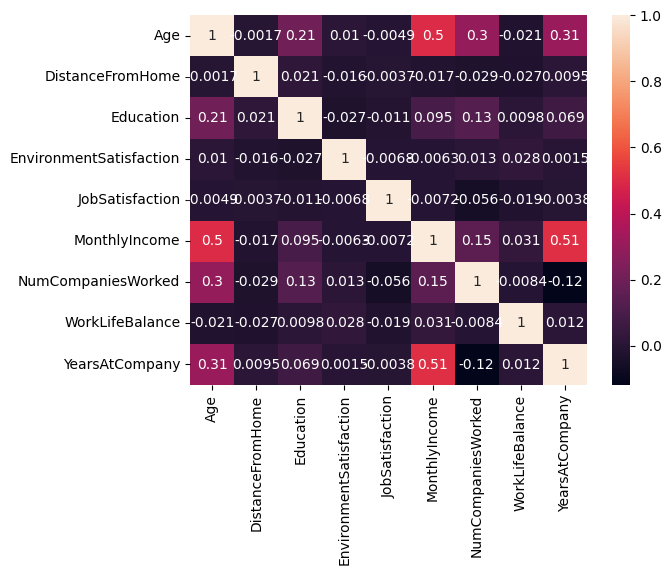

In [7]:
#9  Create a Correlation matrix as well as the correlation heatmap and find out the following correlation values:
cor=df.corr()
print(cor)
import seaborn as sns
sns.heatmap(cor, annot=True, color= )

In [ ]:
# What is the correlation value between the monthly salary and the number of years the employee has worked in that company
#ans: Correlation value = 0.51


# What is the correlation value between the monthly salary and the age of the employee.
#ans: Correlation value = 0.5

In [31]:
# Creating a new column age group
df['Age_group'] = pd.cut(df['Age'], bins=[0, 25, 50, 100], labels=['Fresher', 'Intermediate', 'Expert'])
df.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany,Age_group
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6,Intermediate
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10,Intermediate
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0,Intermediate
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8,Intermediate
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2,Intermediate


In [27]:
#Find the mean, median, mode, and standard deviation of the monthly salary for the employees in the above categories.

mean =df.groupby('Age_group')['MonthlyIncome'].mean()
median=df.groupby('Age_group')['MonthlyIncome'].median()
std_deviation=df.groupby('Age_group')['MonthlyIncome'].std()
print('mean: ', mean)
print('median: ', median)
print('std_deviation: ', std_deviation)

mean:  Age_group
Fresher          2972.886179
Intermediate     6379.930233
Expert          10574.881119
Name: MonthlyIncome, dtype: float64
median:  Age_group
Fresher          2725.0
Intermediate     5037.5
Expert          10552.0
Name: MonthlyIncome, dtype: float64
std_deviation:  Age_group
Fresher         1228.166441
Intermediate    4417.983021
Expert          5918.049639
Name: MonthlyIncome, dtype: float64
